In [40]:
import pandas as pd
import numpy as np

In [95]:
cr = pd.read_csv(r'F:\Imarticus\pandas datasets\CreditRisk.csv')

In [42]:
cr.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [43]:
# PS 1 - build the predictive model which can be used by the bank to approve or reject the loan
# PS 2 - use the model to run a campaign for targetting the good customers

In [44]:
cr.isnull().sum()

Loan_ID               0
Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
Loan_Status           0
dtype: int64

In [45]:
cr.Gender = cr.Gender.fillna('Male')
cr.Married = cr.Married.fillna('No')
cr.Dependents = cr.Dependents.fillna(0)
cr.Self_Employed = cr.Self_Employed.fillna('No')
cr.LoanAmount = cr.LoanAmount.fillna(cr.LoanAmount.mean())
cr.Loan_Amount_Term = cr.Loan_Amount_Term.fillna(cr.Loan_Amount_Term.mean())
cr.Credit_History = cr.Credit_History.fillna(0)

In [46]:
cr = cr.drop(['Loan_ID'], axis = 1)

In [47]:
cr.Gender = cr.Gender.replace({'Male': 1,'Female': 0})
cr.Married = cr.Married.replace({'Yes':1, 'No':0 })
cr.Education = cr.Education.replace({'Graduate':1, 'Not Graduate':0})
cr.Self_Employed = cr.Self_Employed.replace({'Yes':1, 'No':0})
cr.LoanAmount = cr.LoanAmount.replace()
cr.Property_Area = cr.Loan_Amount_Term.replace({'Rural':0, 'Semiurban':1, 'Urban':2})
cr.Loan_Status = cr.Loan_Status.replace({'Y':1, 'N':0})


In [48]:
from sklearn.model_selection  import train_test_split

In [49]:
cr_train , cr_test = train_test_split(cr , test_size= .2)

In [50]:
cr_train_x  = cr_train.iloc[: , 0:-1]
cr_train_y  = cr_train.iloc[: , -1]

In [51]:
cr_test_x  = cr_test.iloc[: , 0:-1]
cr_test_y  = cr_test.iloc[: , -1]

# Model Building 

In [53]:
from sklearn.linear_model import LogisticRegression
glm = LogisticRegression()

In [54]:
glm.fit(cr_train_x, cr_train_y)

LogisticRegression()

In [56]:
pred_cr = glm.predict(cr_test_x)
pred_cr

array([1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [57]:
from sklearn.metrics import confusion_matrix

In [58]:
tab_cr = confusion_matrix(cr_test_y, pred_cr )
tab_cr

array([[ 21,  27],
       [  9, 140]], dtype=int64)

In [61]:
tab_cr.diagonal().sum() * 100/ tab_cr.sum()

81.7258883248731

In [62]:
from sklearn.metrics import accuracy_score

In [63]:
accuracy_score(cr_test_y, pred_cr)

0.817258883248731

In [64]:
from sklearn.metrics import precision_score

In [65]:
precision_score(cr_test_y, pred_cr)

0.8383233532934131

In [66]:
from sklearn.metrics import recall_score

In [67]:
recall_score = (cr_test_y, pred_cr)

In [68]:
from sklearn.metrics import f1_score

In [69]:
f1_score(cr_test_y, pred_cr)

0.8860759493670886

In [71]:
glm.predict_proba(cr_test_x)

array([[0.1237982 , 0.8762018 ],
       [0.18191463, 0.81808537],
       [0.64401156, 0.35598844],
       [0.1255656 , 0.8744344 ],
       [0.57630286, 0.42369714],
       [0.55713227, 0.44286773],
       [0.10344233, 0.89655767],
       [0.11856715, 0.88143285],
       [0.12792965, 0.87207035],
       [0.12406523, 0.87593477],
       [0.18588319, 0.81411681],
       [0.45284511, 0.54715489],
       [0.11709535, 0.88290465],
       [0.12240048, 0.87759952],
       [0.09977446, 0.90022554],
       [0.24209702, 0.75790298],
       [0.0928808 , 0.9071192 ],
       [0.17107941, 0.82892059],
       [0.15798356, 0.84201644],
       [0.6419324 , 0.3580676 ],
       [0.17374647, 0.82625353],
       [0.18846096, 0.81153904],
       [0.21152497, 0.78847503],
       [0.12772415, 0.87227585],
       [0.67364194, 0.32635806],
       [0.22855796, 0.77144204],
       [0.12441474, 0.87558526],
       [0.18504703, 0.81495297],
       [0.12225936, 0.87774064],
       [0.49031945, 0.50968055],
       [0.

In [73]:
pred_prob = glm.predict_proba(cr_test_x)
pred_prob

array([[0.1237982 , 0.8762018 ],
       [0.18191463, 0.81808537],
       [0.64401156, 0.35598844],
       [0.1255656 , 0.8744344 ],
       [0.57630286, 0.42369714],
       [0.55713227, 0.44286773],
       [0.10344233, 0.89655767],
       [0.11856715, 0.88143285],
       [0.12792965, 0.87207035],
       [0.12406523, 0.87593477],
       [0.18588319, 0.81411681],
       [0.45284511, 0.54715489],
       [0.11709535, 0.88290465],
       [0.12240048, 0.87759952],
       [0.09977446, 0.90022554],
       [0.24209702, 0.75790298],
       [0.0928808 , 0.9071192 ],
       [0.17107941, 0.82892059],
       [0.15798356, 0.84201644],
       [0.6419324 , 0.3580676 ],
       [0.17374647, 0.82625353],
       [0.18846096, 0.81153904],
       [0.21152497, 0.78847503],
       [0.12772415, 0.87227585],
       [0.67364194, 0.32635806],
       [0.22855796, 0.77144204],
       [0.12441474, 0.87558526],
       [0.18504703, 0.81495297],
       [0.12225936, 0.87774064],
       [0.49031945, 0.50968055],
       [0.

In [72]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [74]:
roc_auc_score(cr_test_y, pred_cr)   ## area under the curve

0.6885486577181208

In [ ]:
roc_curve(cr_test_y, pred_prob[:, 1])

In [75]:
fpr, tpr, threshold = roc_curve(cr_test_y, pred_prob[:, 1])

In [77]:
import matplotlib.pyplot as plt

In [81]:
Area = roc_auc_score(cr_test_y, pred_cr)
Area

0.6885486577181208

In [82]:
import numpy as np
Area = np.round(Area,3)

Text(0.5, 0.4, '0.689')

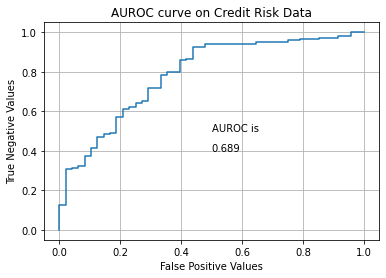

In [85]:
plt.plot(fpr, tpr)
plt.xlabel('False Positive Values')
plt.ylabel('True Negative Values')
plt.title('AUROC curve on Credit Risk Data')
plt.grid()
plt.text(x = .5, y = .5, s = 'AUROC is')
plt.text(x = .5, y = .4, s = Area)

In [ ]:
## probelm statement 2

In [86]:
pred_prob_full = glm.predict_proba(cr.iloc[:, 0: -1])

In [88]:
pred_prob_full = pd.DataFrame(pred_prob_full)

In [99]:
pred_prob_full = pred_prob_full.rename(columns = {pred_prob_full.columns[0]: 'Probe0', pred_prob_full.columns[1]: 'Prob1'})

In [100]:
pred_prob_full['LoanIDcustomer'] = cr.Loan_ID

In [101]:
pred_prob_full = pred_prob_full.sort_values('Prob1', ascending = False)
pred_prob_full

,Probe0,Prob1,LoanIDcustomer
133,0.037161,0.962839,LP001482
14,0.045531,0.954469,LP001030
758,0.045947,0.954053,LP001794
686,0.047880,0.952120,LP001375
575,0.050428,0.949572,LP002868
...,...,...,...
950,0.809422,0.190578,LP002853
179,0.810125,0.189875,LP001630
293,0.816695,0.183305,LP001945
338,0.830676,0.169324,LP002113
